In [1]:
import matplotlib.pyplot as plt
import torch
from models_dif import SoftmaxWeight, LocationScaleFlow, DIFDensityEstimator

number of samples = 60000
tensor([1.1355e-03, 1.8151e-03, 2.4611e-04, 3.6813e-03, 2.3744e-03, 3.8337e-03,
        1.8260e-03, 1.2586e-03, 2.5509e-03, 1.5662e-03, 2.1022e-03, 2.4334e-04,
        1.0274e-03, 2.0480e-03, 3.2566e-03, 7.5706e-04, 1.7087e-03, 1.9136e-03,
        2.0044e-03, 1.8808e-03, 1.1573e-03, 3.6862e-04, 1.1712e-03, 1.3190e-03,
        6.9006e-04, 2.5048e-03, 8.0552e-04, 2.9766e-03, 1.6435e-03, 1.6955e-03,
        1.1579e-03, 1.6192e-03, 3.2087e-03, 1.8815e-03, 8.8014e-04, 2.0476e-03,
        3.4618e-03, 1.6626e-03, 3.5022e-03, 6.2310e-05, 3.3345e-03, 2.5454e-03,
        3.2965e-03, 1.0548e-03, 7.4082e-04, 3.3814e-03, 3.6340e-03, 7.1593e-04,
        7.5621e-04, 2.7295e-03, 1.7527e-03, 3.8037e-03, 7.9055e-04, 2.2672e-03,
        1.9656e-04, 3.8400e-03, 6.8173e-04, 1.4071e-03, 3.6274e-03, 1.3515e-04,
        3.1641e-04, 1.2161e-03, 1.7653e-03, 2.0386e-03, 5.4031e-04, 2.0582e-04,
        1.2340e-03, 1.5952e-03, 6.0019e-04, 2.0498e-03, 9.0237e-04, 2.9651e-03,
        3.1093

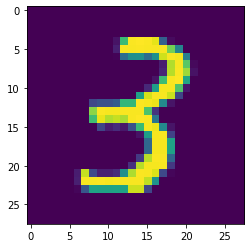

In [2]:
###MNIST###

import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 'all'
if digit != 'all':
    extracted = images[targets == digit].float()
else: 
    extracted = images.float()
target_samples = (extracted + torch.rand(extracted.shape))/255

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[torch.randint(low = 0, high = num_samples, size = [1])].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]
print(train_set[0])

In [33]:
K = 35
dif = DIFDensityEstimator(target_samples, K)
dif.w = SoftmaxWeight(K,p, [256,256,256,256])
dif.train(200, 5000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [10:43<00:00,  3.22s/it, loss = -1638.423828 ; device: cuda]


In [40]:
dif.train(2000, 5000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [1:32:21<00:00,  2.77s/it, loss = -2261.981689 ; device: cuda]


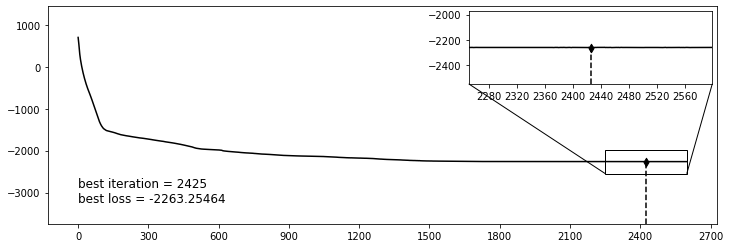

In [41]:
### Visualize training ###
model_to_visualize = dif

import numpy as np
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

loss_values = dif.loss_values
best_loss = min(loss_values)
best_iteration = loss_values.index(best_loss)
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
Y1, Y2 = best_loss - (max(loss_values) -best_loss) / 2, max(loss_values) + (max(loss_values) - best_loss) / 4
ax.set_ylim(Y1, Y2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(loss_values, label='Loss values during training', color='black')
ax.scatter([best_iteration], [best_loss], color='black', marker='d')
ax.axvline(x=best_iteration, ymax=(best_loss -best_loss + (max(loss_values) - best_loss) / 2) / (
        max(loss_values) + (max(loss_values) - best_loss) / 4 - best_loss + (
        max(loss_values) - best_loss) / 2), color='black', linestyle='--')
ax.text(0, best_loss - (max(loss_values) - best_loss) / 8,
        'best iteration = ' + str(best_iteration) + '\nbest loss = ' + str(np.round(best_loss, 5)),
        verticalalignment='top', horizontalalignment='left', fontsize=12)
if len(loss_values) > 30:
    x1, x2 = best_iteration - int(len(loss_values) / 15), min(best_iteration + int(len(loss_values) / 15),
                                                              len(loss_values) - 1)
    k = len(loss_values) / (2.5 * (x2 - x1 + 1))
    offset = (Y2 - Y1) / (6 * k)
    y1, y2 = best_loss - offset, best_loss + offset
    axins = zoomed_inset_axes(ax, k, loc='upper right')
    axins.axvline(x=best_iteration, ymax=(best_loss - y1) / (y2 - y1), color='black', linestyle='--')
    axins.scatter([best_iteration], [best_loss], color='black', marker='d')
    axins.xaxis.set_major_locator(MaxNLocator(integer=True))
    axins.plot(loss_values, color='black')
    axins.set_xlim(x1 - .5, x2 + .5)
    axins.set_ylim(y1, y2)
    mark_inset(ax, axins, loc1=3, loc2=4)

C:\Users\Elouan\AppData\Local\Temp\ipykernel_13740\4165500542.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


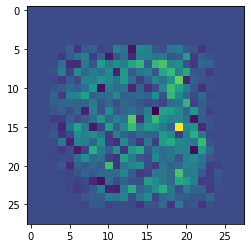

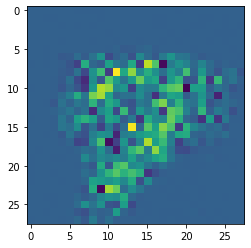

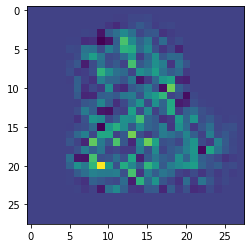

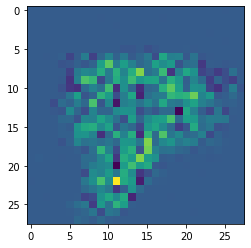

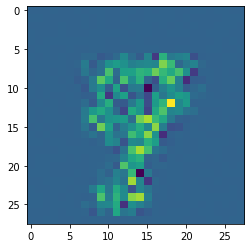

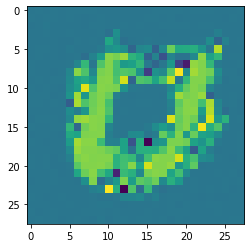

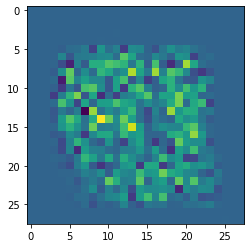

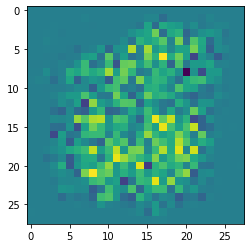

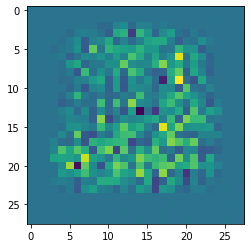

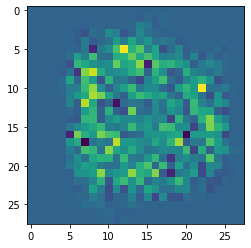

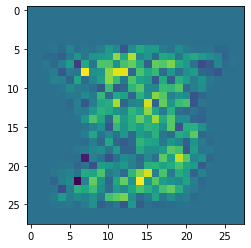

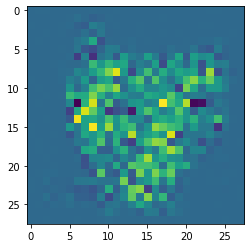

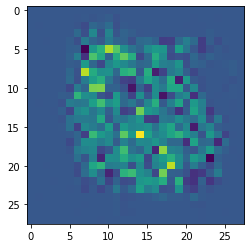

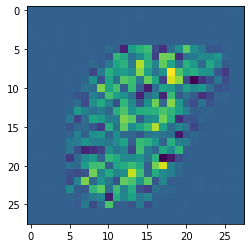

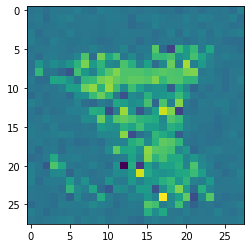

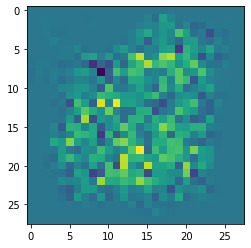

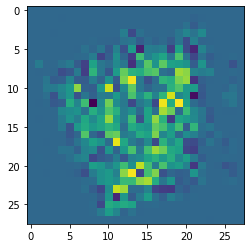

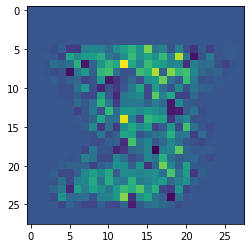

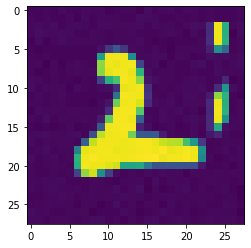

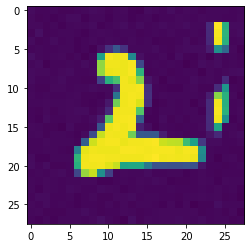

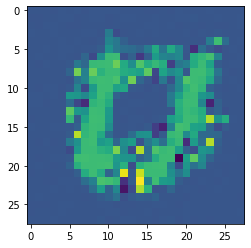

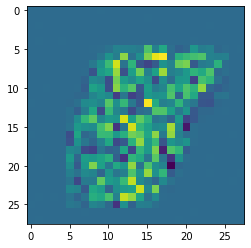

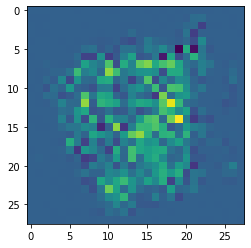

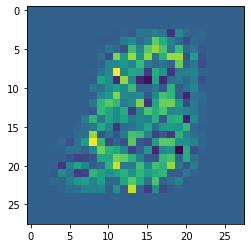

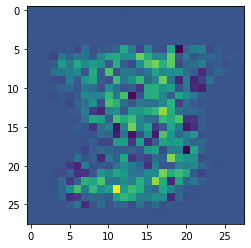

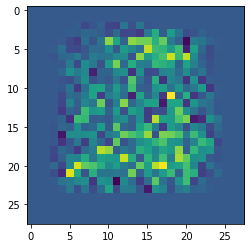

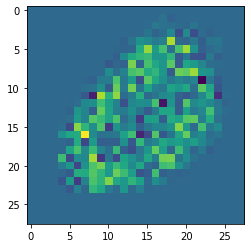

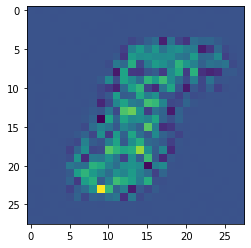

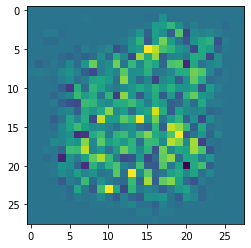

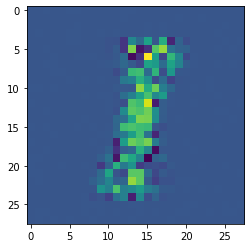

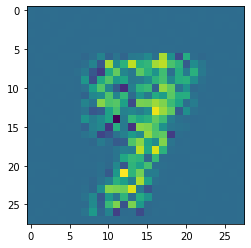

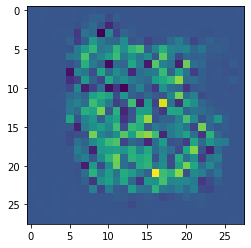

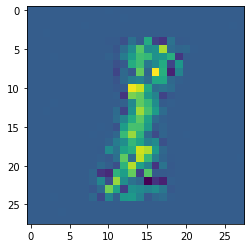

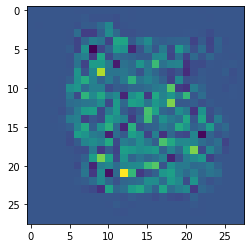

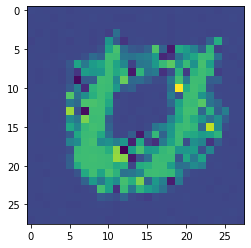

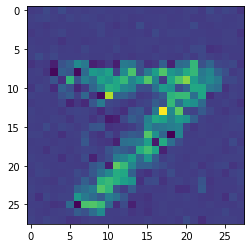

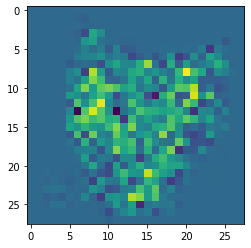

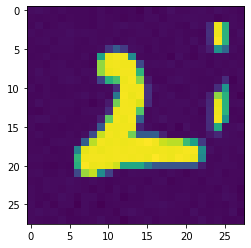

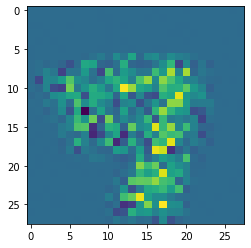

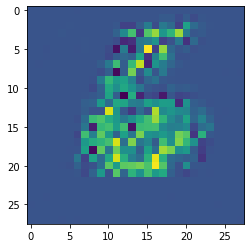

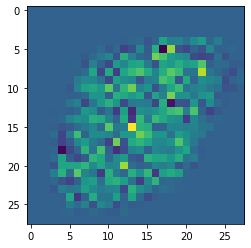

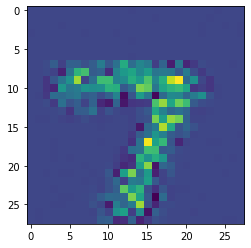

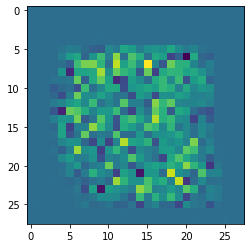

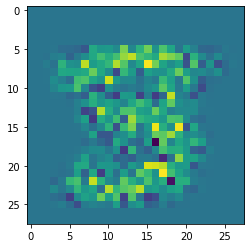

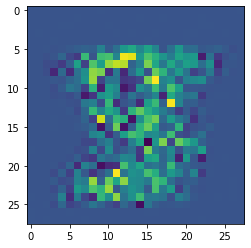

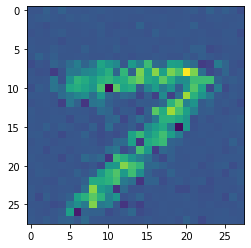

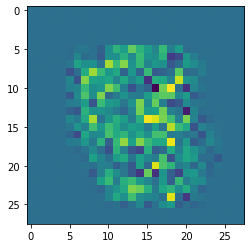

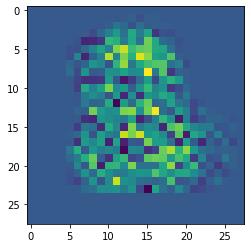

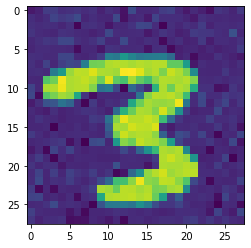

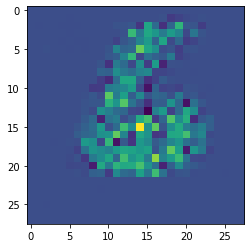

In [42]:
with torch.no_grad():
    for _ in range(50):
        plt.figure()
        sample = dif.sample_model(1)
        plt.imshow(sample[0].reshape(28,28))